> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Analysing TMDB movies dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [356]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

# The dataset used for this analysis is tmdb-movies dataset.

In [357]:


# Load your data and print out a few lines. Perform operations to inspect data
movies = pd.read_csv("tmdb-movies.csv")
movies.head()
#   types and look for instances of missing or possibly errant data.


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [358]:
movies.shape #studying the number of rows and columns in the dataset

(10866, 21)

In [359]:
movies.info() #analysing the counts and identifying columns with null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

# Dropping columns that will be not be used in analysis

In [360]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
movies.drop(['homepage','tagline','keywords','overview'], axis=1, inplace=True) #removing columns that cannot be used for analysis

# checking the new dataframe

In [423]:
movies# verifying that the new dataset is correct

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


In [362]:
movies.info() #checking the dataset counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 17 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(6), object(7)
memory usage: 1.4+ MB


# dropping all null rows from dataframe

In [363]:
movies.dropna(inplace=True) #removing all rows with null values


In [364]:
movies.info() #checking the new dataset counts

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9771 entries, 0 to 10865
Data columns (total 17 columns):
id                      9771 non-null int64
imdb_id                 9771 non-null object
popularity              9771 non-null float64
budget                  9771 non-null int64
revenue                 9771 non-null int64
original_title          9771 non-null object
cast                    9771 non-null object
director                9771 non-null object
runtime                 9771 non-null int64
genres                  9771 non-null object
production_companies    9771 non-null object
release_date            9771 non-null object
vote_count              9771 non-null int64
vote_average            9771 non-null float64
release_year            9771 non-null int64
budget_adj              9771 non-null float64
revenue_adj             9771 non-null float64
dtypes: float64(4), int64(6), object(7)
memory usage: 1.3+ MB


In [365]:
movies.sort_values(by='budget',ascending=False) #looking to see if any zero values are in the budget and revenue columns

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,46528,tt1032751,0.250540,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,12/2/10,74,6.4,2010,4.250000e+08,1.108757e+07
3375,1865,tt1298650,4.955130,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,5/11/11,3180,6.3,2011,3.683713e+08,9.904175e+08
7387,285,tt0449088,4.965391,300000000,961000000,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,Gore Verbinski,169,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...,5/19/07,2626,6.8,2007,3.155006e+08,1.010654e+09
14,99861,tt2395427,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,4/22/15,4304,7.4,2015,2.575999e+08,1.292632e+09
6570,1452,tt0348150,1.957331,270000000,391081192,Superman Returns,Brandon Routh|Kevin Spacey|Kate Bosworth|James...,Bryan Singer,154,Adventure|Fantasy|Action|Science Fiction,DC Comics|Legendary Pictures|Warner Bros.|Bad ...,6/28/06,834,5.3,2006,2.920507e+08,4.230205e+08
1929,38757,tt0398286,2.865684,260000000,591794936,Tangled,Zachary Levi|Mandy Moore|Donna Murphy|Ron Perl...,Nathan Greno|Byron Howard,100,Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,11/24/10,2019,7.3,2010,2.600000e+08,5.917949e+08
4411,49529,tt0401729,1.588457,260000000,284139100,John Carter,Taylor Kitsch|Lynn Collins|Mark Strong|Willem ...,Andrew Stanton,132,Action|Adventure|Fantasy|Science Fiction,Walt Disney Pictures,3/7/12,1479,6.0,2012,2.469335e+08,2.698595e+08
7394,559,tt0413300,2.520912,258000000,890871626,Spider-Man 3,Tobey Maguire|Kirsten Dunst|James Franco|Thoma...,Sam Raimi,139,Fantasy|Action|Adventure,Columbia Pictures|Laura Ziskin Productions|Mar...,5/1/07,2083,5.8,2007,2.713305e+08,9.369017e+08
5508,57201,tt1210819,1.214510,255000000,89289910,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,Gore Verbinski,149,Action|Adventure|Western,Walt Disney Pictures|Jerry Bruckheimer Films|I...,7/3/13,1607,6.0,2013,2.386885e+08,8.357833e+07
1389,767,tt0417741,5.076472,250000000,933959197,Harry Potter and the Half-Blood Prince,Daniel Radcliffe|Rupert Grint|Emma Watson|Tom ...,David Yates,153,Adventure|Fantasy|Family,Warner Bros.|Heyday Films,7/7/09,3220,7.3,2009,2.541001e+08,9.492765e+08


In [366]:
movies_final = movies.query('budget != 0' and 'revenue! = 0') #removing all zero values from the budget and revenue columns.Saving the dataset for analysis

# Values where budget and revenue are not zero is taken because having budget or revenue to be 0 is not possible as every movie has some cost associated with production and every movies has some revenue no matter how small.

In [367]:
movies_final.head() #checking the new dataset

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


# checking new data counts

In [368]:
movies_final.info() #verfying changes to dataset counts

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4751 entries, 0 to 10848
Data columns (total 17 columns):
id                      4751 non-null int64
imdb_id                 4751 non-null object
popularity              4751 non-null float64
budget                  4751 non-null int64
revenue                 4751 non-null int64
original_title          4751 non-null object
cast                    4751 non-null object
director                4751 non-null object
runtime                 4751 non-null int64
genres                  4751 non-null object
production_companies    4751 non-null object
release_date            4751 non-null object
vote_count              4751 non-null int64
vote_average            4751 non-null float64
release_year            4751 non-null int64
budget_adj              4751 non-null float64
revenue_adj             4751 non-null float64
dtypes: float64(4), int64(6), object(7)
memory usage: 668.1+ KB


# getting statistics on revenue column for future analysis

In [369]:
movies_split = movies_final #using a dataset for further analysis

# separating the cast column into primary actor and secondary actors

In [370]:
movies_split['primary_actor'], movies_split['secondary_actors'] = movies_split['cast'].str.split('|',1).str #using split function to seperate cast at '| into primary and secondary actors

C:\Users\prane\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [371]:
movies_split.drop(['secondary_actors'], axis=1, inplace=True) #dropping secondary actors column as all analysis will be based on primary actors

C:\Users\prane\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [372]:
movies_split.head() #confirming the new dataset

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,primary_actor
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Harrison Ford
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Vin Diesel


In [373]:
movies_split['primary_genre'], movies_split['secondary_genres'] = movies_split['genres'].str.split('|',1).str #using split function to seperate genres at '| into primary genre and secondary genres

C:\Users\prane\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [374]:
movies_split #checking the new dataset

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,primary_actor,primary_genre,secondary_genres
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Action,Adventure|Science Fiction|Thriller
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy,Action,Adventure|Science Fiction|Thriller
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley,Adventure,Science Fiction|Thriller
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Harrison Ford,Action,Adventure|Science Fiction|Fantasy
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Vin Diesel,Action,Crime|Thriller
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08,Leonardo DiCaprio,Western,Drama|Adventure|Thriller
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08,Arnold Schwarzenegger,Science Fiction,Action|Thriller|Adventure
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08,Matt Damon,Drama,Adventure|Science Fiction
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09,Sandra Bullock,Family,Animation|Adventure|Comedy
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08,Amy Poehler,Comedy,Animation|Family


In [375]:
movies_split.drop(['secondary_genres','genres','cast'], axis=1, inplace=True) #dropping genres and secondary_genres column as we will use primary_genre for our analysis

C:\Users\prane\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [376]:
movies_split #final check to make sure that the dataset is clean

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,primary_actor,primary_genre
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Action
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy,Action
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley,Adventure
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Harrison Ford,Action
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,137,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Vin Diesel,Action
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08,Leonardo DiCaprio,Western
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Alan Taylor,125,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08,Arnold Schwarzenegger,Science Fiction
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Ridley Scott,141,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08,Matt Damon,Drama
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Kyle Balda|Pierre Coffin,91,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09,Sandra Bullock,Family
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Pete Docter,94,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08,Amy Poehler,Comedy


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

#   The first question is on identifying the top 10 director and actor combinations based on revenue. Additionally, What influences budget in a movie and how has it varied based on other data?


# grouping data based on director, primary_actor including the revenue sum for every combination

In [377]:
movies_rev_sum = movies_split.groupby(['director','primary_actor'])[['revenue']].sum() #grouping the movies_split dataset based on director,primary_actor and obtaining a revenue sum for each combination

In [378]:
movies_rev_sum #studying the new dataset

revenue
director                      primary_actor                    
 FrÃ©dÃ©ric Jardin            Tomer Sisley                 3358
Aaron Blaise|Robert Walker    Joaquin Phoenix               250
Aaron Moorhead|Justin Benson  Lou Taylor Pucci            49970
Aaron Norris                  Chuck Norris             10848189
Aaron Seltzer|Jason Friedberg Alyson Hannigan          48548426
Abbas Tyrewala                Imran Khan               11100000
Abe Sylvia                    Juno Temple                 55125
Abel Ferrara                  Christopher Walken        2554476
                              Gabrielle Anwar            428868
                              Harvey Keitel             2019469
                              Willem Dafoe                17801
Adam Brooks                   Ryan Reynolds            55447968
Adam Green                    Danielle Harris             52604
                              Emma Bell                 3065860
Adam Kassen|Mark Kassen       Chris Evans                 68945
Adam Marcus                   Kane Hodder                    15
Adam McKay                    Christian Bale          133346506
                              Will Ferrell            725729949
Adam Rifkin                   Charlie Sheen             8009329
                              Giuseppe Andrews          4217115
Adam Shankman                 Adam Sandler            212874442
                              Jennifer Lopez           94728529
                              John Travolta            90450008
                              Mandy Moore              41227069
                              Steve Martin            261857232
                              Tom Cruise               59418613
                              Vin Diesel              113006880
Adam Wingard                  Dan Stevens               2367161
                              Sharni Vinson            14347000
Adrian Lyne                   Jennifer Beals           92921203
...                                                         ...
Woody Allen                   Cate Blanchett           97505481
                              Chiwetel Ejiofor         20085825
                              Colin Firth              32339326
                              Ellen Page               73244881
                              Emma Stone               27391084
                              Jonathan Rhys Meyers     85306374
                              Mia Farrow               10631333
                              Owen Wilson             151119219
                              Scarlett Johansson      127993553
                              Woody Allen             226407402
Wych Kaosayananda             Antonio Banderas         19924033
Xan Cassavetes                JosÃ©phine de la Baume      14752
Xavier Dolan                  Anne Dorval               3494070
Xavier Gens                   Lauren German               22000
                              Timothy Olyphant         99965753
Yann Demange                  Jack O'Connell            1625847
Yaron Zilberman               Philip Seymour Hoffman    1562546
Yorgos Lanthimos              Colin Farrell             9064511
Zach Braff                    Zach Braff               32265022
Zach Helm                     Dustin Hoffman           69474661
Zack Snyder                   Emily Barclay           140073390
                              Emily Browning           89792502
                              Gerard Butler           422610419
                              Henry Cavill            662845518
                              Malin Ã…kerman          185258983
                              Sarah Polley            102356381
Zal Batmanglij                Brit Marling              2401510
Zalman King                   Sherilyn Fenn             1547397
Ã‰mile Gaudreault             Luke Kirby                3031801
Ã€lex Pastor|David Pastor     Lou Taylor Pucci          5802422

[4353 rows x 1 columns]

In [379]:
movies_rev_sum.shape #checking the number of rows and columns in the dataset

(4353, 1)

In [380]:
movies_rev_sum.describe() #using the describe function to get the 75% of the revenue column. This could be used to reduce the datset

,revenue
count,4.353000e+03
mean,9.929436e+07
std,2.231619e+08
min,2.000000e+00
25%,7.847000e+06
50%,3.143033e+07
75%,9.754295e+07
max,4.154296e+09


# dropping all rows with less than 75 percentile of revenue

In [381]:
movies_rev_sum.drop(movies_rev_sum[movies_rev_sum.revenue < 2.856062e+07].index, inplace = True) #removing all values less than the 75% of revenue. This should help reduce the dataset

In [382]:
movies_rev_sum #checking the dataset and data counts

revenue
director                          primary_actor                   
Aaron Seltzer|Jason Friedberg     Alyson Hannigan         48548426
Adam Brooks                       Ryan Reynolds           55447968
Adam McKay                        Christian Bale         133346506
                                  Will Ferrell           725729949
Adam Shankman                     Adam Sandler           212874442
                                  Jennifer Lopez          94728529
                                  John Travolta           90450008
                                  Mandy Moore             41227069
                                  Steve Martin           261857232
                                  Tom Cruise              59418613
                                  Vin Diesel             113006880
Adrian Lyne                       Jennifer Beals          92921203
                                  Michael Douglas        320145693
                                  Richard Gere           119137784
                                  Robert Redford         266614059
Akiva Goldsman                    Colin Farrell           30800231
Akiva Schaffer                    Ben Stiller             68267862
Alan J. Pakula                    Harrison Ford          362110735
                                  Julia Roberts          195268056
                                  Meryl Streep            30036000
                                  Robert Redford          70600000
Alan Metter                       Rodney Dangerfield      91258000
Alan Parker                       Brad Davis              35000000
                                  Gene Hackman            34604000
                                  Kevin Spacey            38955598
                                  Madonna                141047179
Alan Poul                         Jennifer Lopez          77477008
Alan Taylor                       Arnold Schwarzenegger  440603537
                                  Chris Hemsworth        479765000
Alastair Fothergill|Mark Linfield Patrick Stewart        109000000
...                                                            ...
William Friedkin                  Gene Hackman            41158757
                                  Linda Blair            441306145
                                  Tommy Lee Jones        105234008
William Malone                    Geoffrey Rush           40846082
William Peter Blatty              George C. Scott         39024251
William Shatner                   William Shatner         70200000
Wolfgang Petersen                 Brad Pitt              497409852
                                  Clint Eastwood         176997168
                                  Dustin Hoffman         189859560
                                  George Clooney         325756637
                                  Harrison Ford          315156409
                                  Kurt Russell           181674817
Wolfgang Reitherman               Brian Bedford           32056467
                                  Phil Harris            261518869
Woody Allen                       Cate Blanchett          97505481
                                  Colin Firth             32339326
                                  Ellen Page              73244881
                                  Jonathan Rhys Meyers    85306374
                                  Owen Wilson            151119219
                                  Scarlett Johansson     127993553
                                  Woody Allen            226407402
Xavier Gens                       Timothy Olyphant        99965753
Zach Braff                        Zach Braff              32265022
Zach Helm                         Dustin Hoffman          69474661
Zack Snyder                       Emily Barclay          140073390
                                  Emily Browning          89792502
                                  Gerard Butler          422610419
                                  Henry

# The dataset is still large after dropping 75% of the data. This is unexpected. I then proceed to select only the 20 largest using the nlargest function.

# selecting 20 largest rows based on revenue

In [383]:
movies_rev_sum_20 = movies_rev_sum.nlargest(20,'revenue') #selecting the 20 largest rows based on revenue

# identifying top 20 director and actor combinations

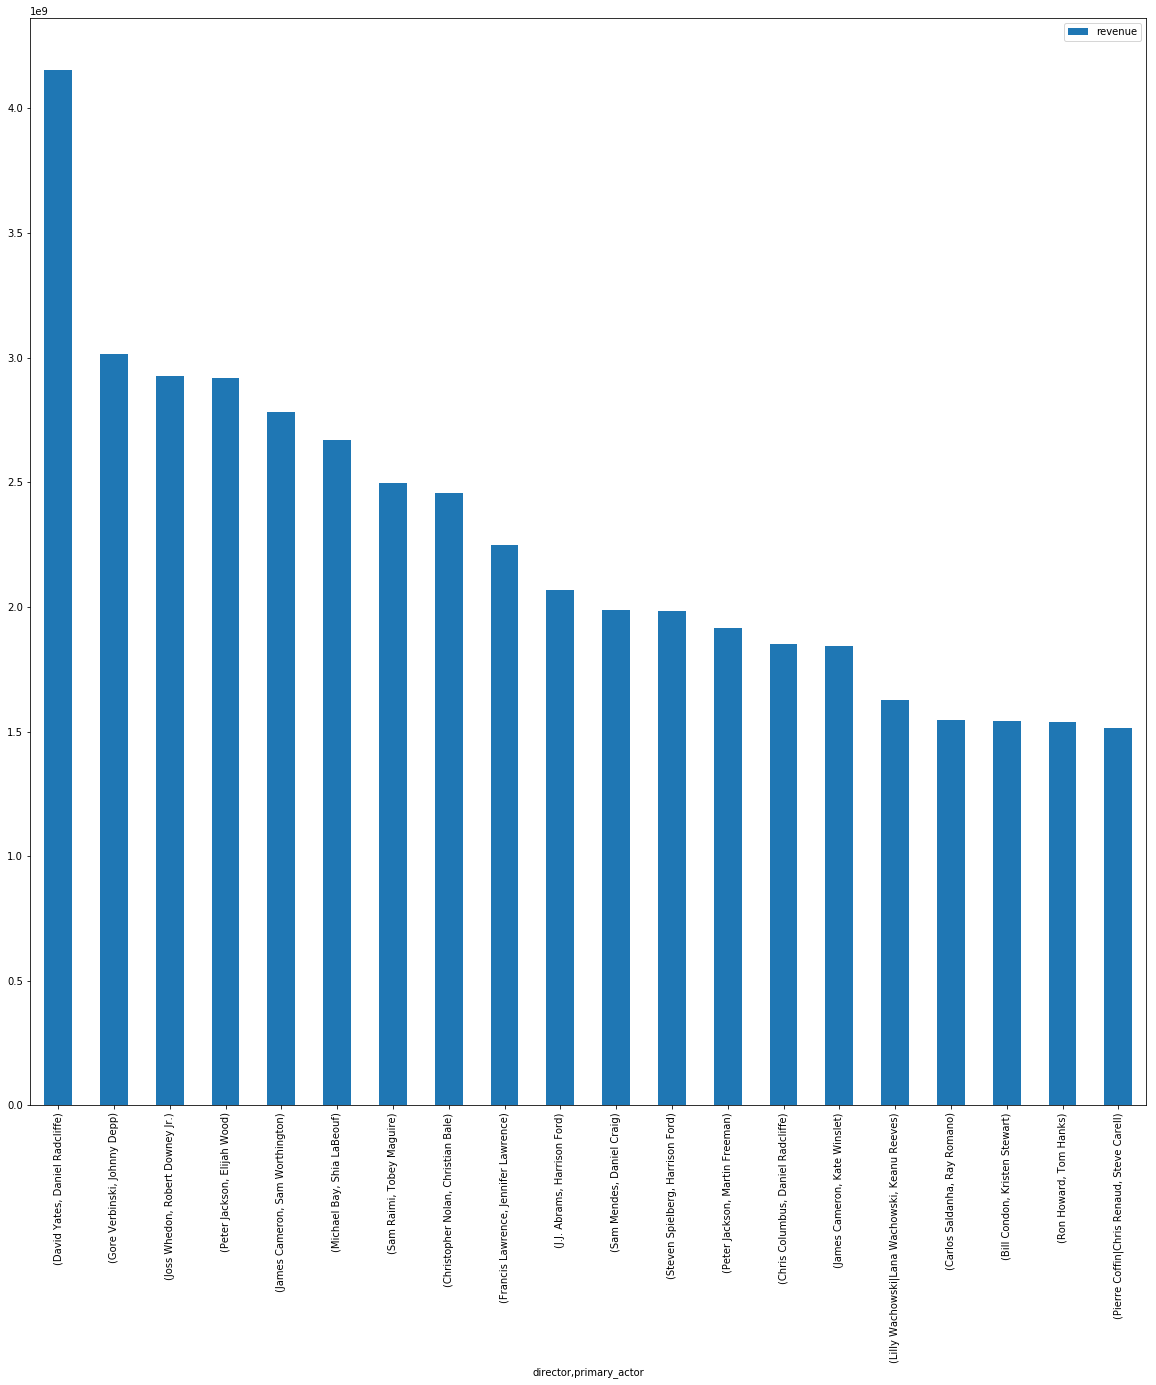

In [384]:
movies_rev_sum_20.plot(kind = 'bar', figsize = (20,20)) #plotting the bar chart for the data to see how the revenue varies accross the top 20 director/actor combination

# The data is sorted from the highest to the lowest based on revenue.The director and actor combination with the highest revenue have a high differnetial with second value. The values from 2,3,4 & 12,13,14,15 & 18,19,20 do not have  high differential between them. This shows that most popular director/actor combinations have revenue sums fairly close to their competitors.

# Limitations: Since this plot only considers the primary actors, there is a possibility of the primary actor reappearing with the same director in a smaller role. These movies and roles have not been considered in this plot. We would get a different plot if all roles of an actor are considered. Also it does not consider rows with budget and revenue values of zero, these rows could be errors in the dataset, which could mean that some of these rows could appear in the plot above. So our analysis is limited to the new dataset due to possible errors in the orginal data.

# grouping data by genres with mean values for other columns

In [385]:
movies_genres = movies_split.groupby('primary_genre').mean() #groupping data based on primary_genre and obtaining the means for the primary_genre


In [386]:
pd.DataFrame(movies_genres) #converting the dataset to a dataframe, this is neccessary for plots

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
primary_genre,,,,,,,,,,
Action,34056.212714,1.289337,4.354479e+07,1.179550e+08,109.799511,620.237164,5.968949,1999.627139,5.137019e+07,1.436905e+08
Adventure,28878.416667,1.775530,6.517707e+07,2.098878e+08,113.830460,897.893678,6.230172,1998.543103,7.766266e+07,2.801251e+08
Animation,44295.330508,1.568437,6.951864e+07,2.436322e+08,89.127119,810.788136,6.347458,2004.635593,7.411055e+07,2.614869e+08
Comedy,38060.133398,0.821593,2.003493e+07,6.610912e+07,101.474197,268.500487,6.007108,2000.868549,2.373040e+07,8.658866e+07
Crime,42836.679612,0.994759,2.168883e+07,6.168219e+07,113.650485,389.009709,6.411650,1999.359223,2.654382e+07,8.645671e+07
Documentary,78665.138462,0.293364,1.959972e+06,1.224896e+07,100.753846,68.246154,6.969231,2006.661538,2.129665e+06,1.338313e+07
Drama,51904.596444,0.834118,1.944073e+07,5.473932e+07,115.954667,317.533333,6.404267,2001.837333,2.435711e+07,7.793501e+07
Family,59969.387755,1.447363,4.928571e+07,1.807031e+08,93.693878,565.265306,5.989796,2001.857143,5.506021e+07,2.270164e+08
Fantasy,31124.007463,1.394862,4.539590e+07,1.365601e+08,103.320896,594.097015,6.009701,1999.641791,5.244414e+07,1.680973e+08


# dropping columns- This section will be about analysing budget and revenue so all other columns have been dropped

In [387]:
movies_genres.drop(['id','popularity','vote_average','release_year','runtime','vote_count'], axis = 1, inplace = True) #dropping all columns other than budget and revenue

In [388]:
movies_genres.drop(['budget_adj','revenue_adj'], axis = 1, inplace = True)#dropping all columns other than budget and revenue

# selecting top 50 movies with the highest budget 

In [389]:
#movies_genres_50 = movies_genres.nlargest(50,'budget') #using nlargest to select the 50 movies with the highest budget

In [390]:
#movies_genres_50#using head function to verify the dataset

# plotting to check how budget and revenue varies with genre

Text(0,0.5,'budget')

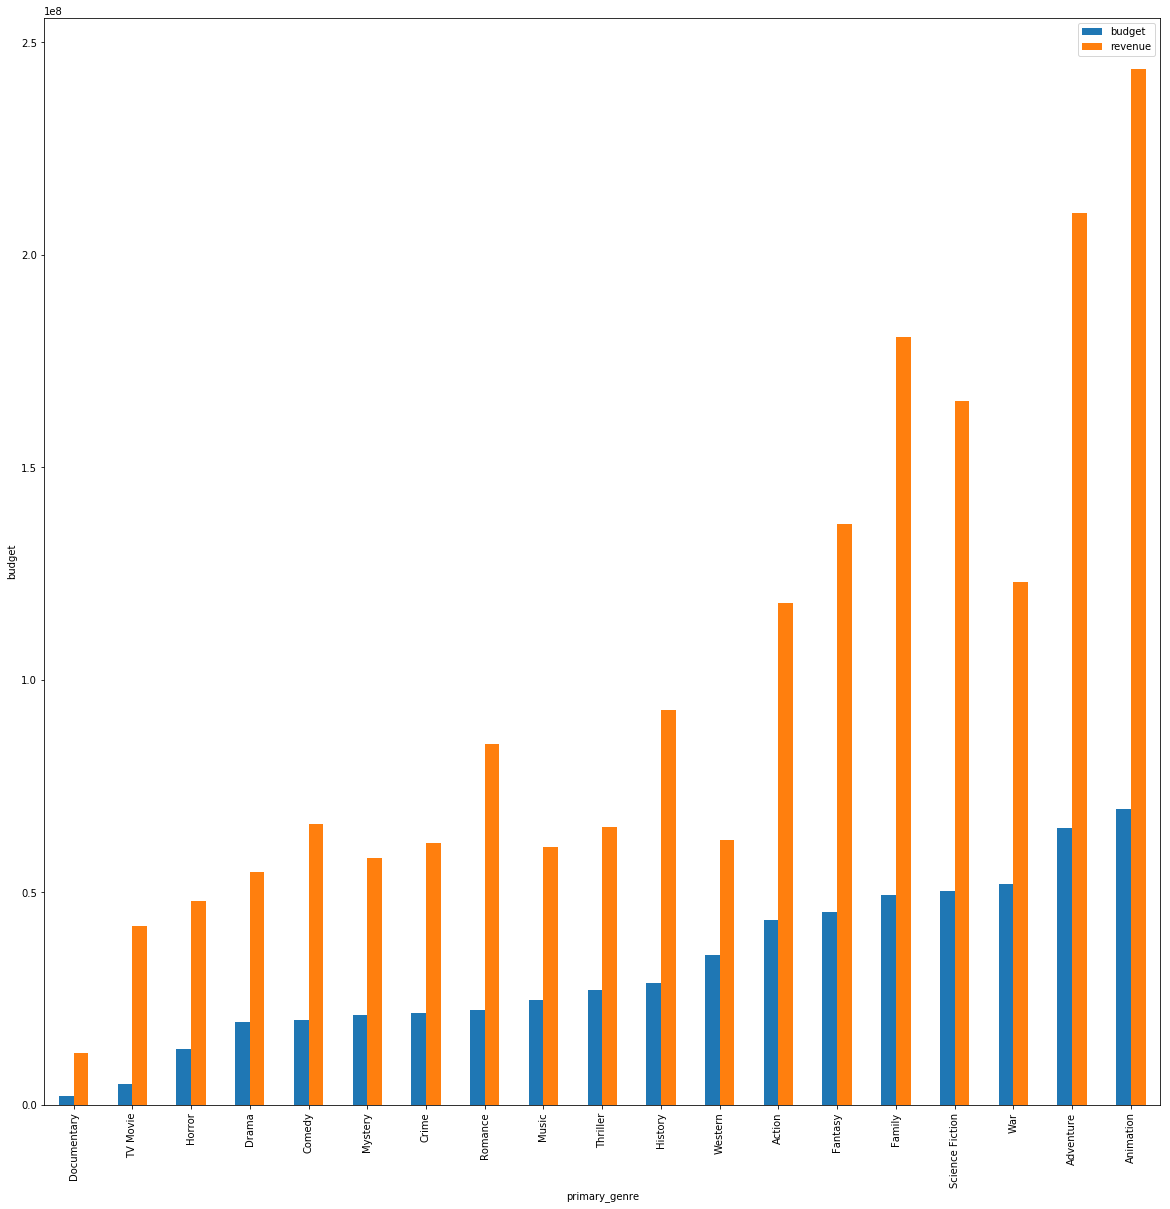

In [391]:
movies_genres.sort_values(by='budget',ascending=True).plot(kind='bar', figsize=(20,20)) #checking how budget varies with genre and year
plt.xlabel('primary_genre')
plt.ylabel('budget')

# Does budget depend on genre?. Yes it does.The graph shows that animation and adventure movies have the highest budgets. It also confirms that producers will use movie genres to set budgets for any movie.When looking at mean values by genre it appears that mean budget values are significantly higher than the mean revenue values. This could be because most movies in a genre may have relatively close budgets, while the revenue values are low because large number of movies could have low to medium revenue and very few movies could have high revenues.

# Limitations: This plot only considers the primary genre. We could have movies that are animated but are classified under adventure in this plot. Since the orginal dataset did not have one genre category it is not possible to correctly classify all movies in the dataset. Budget and revenue values of zero are excluded from this dataset. These values when corrected could possibly add more data to the plot above. So there could  be movies that have budget values that are excluded due to errors in data. The current analysis is limited to the dataset used above for the plots.

# plotting to see how budget varies with runtime for the entire dataset

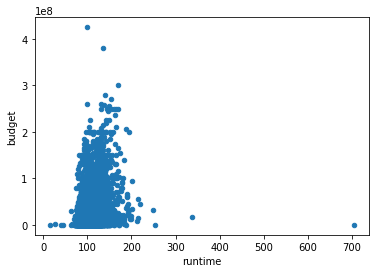

In [392]:
movies_split.plot(x='runtime', y='budget', kind='scatter') 

 # Does budget vary significantly with runtime?. It changes over a wide range but does not vary signifcantly within 100 and 180 mins. This plot shows that most medium to high budget movies have a run time between 100 to 180 mins. Anything lesser than 100 and greater than 180 mins appear to be low budget movies.There appears to be no specific relationship between budget and runtime. We cannot use runtime to predict the possible budget of a movie
 
 # Limitations: Rows with budget and revenue values of zero are exluded from this data. This limits our analysis to viewing a large cluster of runtime and budget values in the nearly the location. If errors to budget and revenue values were corrected we might see a better distribution of data, which could lead to better conclusions.



# plots explaining how budget varies with release year

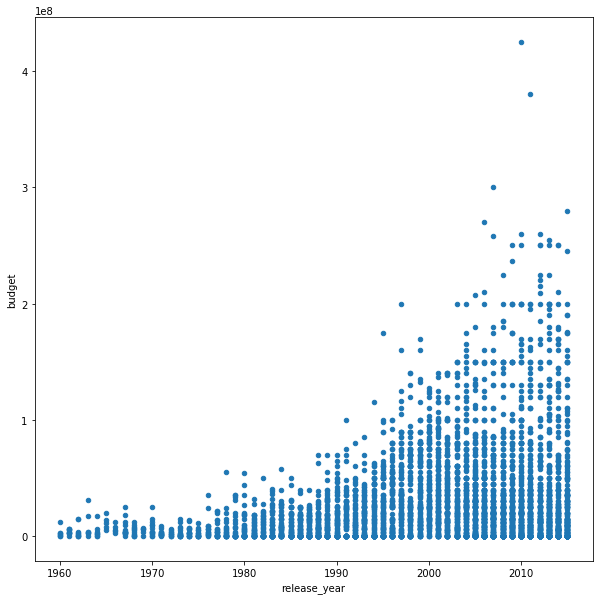

In [393]:
movies_split.plot(x='release_year', y= 'budget', kind='scatter', figsize = (10,10)) 

# Does budget change with release year?. Yes it does. The budget increases with release_year as expected. We see a positive relationship where mean budget increases for every year. This is because of the technological advancements and demands of movie goers.  We can expect the budget to continue to increase as hollywood aims to continue dazzling us with big budget movies.

# Limitations: We do not consider budget and revenue values of zero for this analysis. The budget and revenue values of zero are considered to be errors but addition of that data once corrected could changes to the plot above. But we are limited to the dataset used for the plot above until the orginal dataset is corrected.

# Additional question does popularity depend on runtime

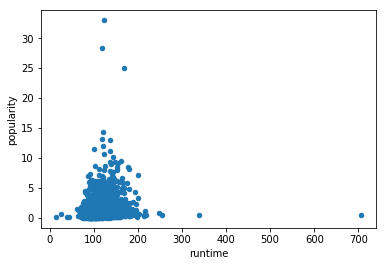

In [394]:
movies_split.plot(x='runtime', y='popularity', kind='scatter') 

# Does popularity depend on runtime?. Yes it does.The popularity values are clustered in the range of 100 to 200. This shows than anything below 100 and above 200 generally have low popularity ratings. This cannot be explained by budget as we find from the previous graph, some movies with runtimes less than 100 have medium level budgets. We can study this further in the graph below.

# Limitations: Budget and revenue values of zero are excluded from this dataset as they are considered to be errors. If they errors were corrected we could see a greater distribution of popularity and runtime, which could help us add further proof to our conclusions. But currently we are limited to the dataset used above for analysis.

# additional question does popularity depend on budget

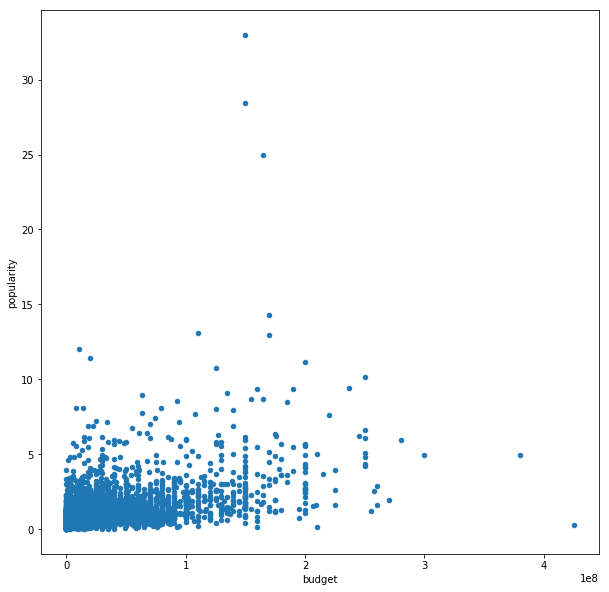

In [395]:
movies_split.plot(x='budget', y= 'popularity', kind='scatter', figsize = (10,10)) 

# Does popularity depend on budget?. No it does not appear to depend on budget. Even low budget movies have the same popularity ratings as the high budget movies. Most popular movie does not have the highest budget movie in the graph. Budget does not influence popularity.

# Limitations: Budget and revenue values of zero are not used in this analysis as they are considered to be errors. Addition of that data after changes could lead better distribution of data and with more data points, we could draw effective conclusions. But currently we are limited to the dataset used above for analysis.

# What genres are most popular from year to year?

# Continue to explore the data to address your additional research
  



# grouping data by genres and release year with maximum revenue for each combined value

In [396]:
movies_genre_maxrev = movies_split.groupby(['primary_genre','release_year'])[['revenue']].max() # selecting the genre and maximum revenue for every year in that genre

In [397]:
movies_genre_maxrev #checking the data

revenue
primary_genre release_year           
Action        1960           60000000
              1961           28900000
              1963           78898765
              1965           29950000
              1966           20000000
              1967          111584787
              1968           42300873
              1970          100489151
              1971           72266306
              1972           84563118
              1973           39768000
              1974          116000000
              1975           27476252
              1976           52614445
              1977          126737428
              1978           78000000
              1979          210300000
              1980          108185706
              1981           85300000
              1982          125212904
              1983           67642693
              1984          316360478
              1985          300400432
              1986           79817939
              1987          299965036
              1988          189015611
              1989          227853986
              1990          261317921
              1991          520000000
              1992          280000000
...                               ...
War           1989           26828365
              1993           25000000
              1995           15000000
              2001           96976270
              2002           29882645
              2004          497409852
              2006           65900249
              2008           20416563
              2011              17479
              2012           44806783
              2013           68129518
              2014          542307423
              2015          650523427
Western       1961            4300000
              1962           50000000
              1967            6000000
              1968            6800000
              1970            5050000
              1972            6330000
              1975            8022000
              1980           15795189
              1992          159157447
              2002          122563539
              2003           68296293
              2004          108103450
              2006            1196307
              2007           70016220
              2013            1031243
              2014            2429989
              2015          532950503

[628 rows x 1 columns]

# selecting largest revenue values by year

In [398]:
movies_new = pd.DataFrame(movies_genre_maxrev.groupby('release_year')['revenue'].nlargest(1).reset_index(level=0, drop=True)) #selecting the rows with the largest revenue values for each year

# stripping white spaces from columns

In [399]:
movies_new #checking the data

revenue
primary_genre   release_year            
Action          1960            60000000
Adventure       1961           215880014
                1962            70000000
Action          1963            78898765
Adventure       1964           124900000
Drama           1965           163214286
                1966            33736689
Family          1967           205843612
Science Fiction 1968            56715371
History         1969           102308889
Drama           1970           136400000
Adventure       1971           116000000
Drama           1972           245066411
                1973           441306145
Comedy          1974           119500000
Horror          1975           470654000
Drama           1976           161000000
Adventure       1977           775398007
                1978           300218018
Action          1979           210300000
Adventure       1980           538400000
                1981           389925971
Science Fiction 1982           792910554
Adventure       1983           572700000
                1984           333000000
                1985           381109762
Drama           1986           356830601
Horror          1987           320145693
Drama           1988           354825435
Adventure       1989           474171806
Fantasy         1990           505000000
Action          1991           520000000
Animation       1992           504050219
Adventure       1993           920100000
Family          1994           788241776
Crime           1995          1106279658
Action          1996           816969268
Drama           1997          1845034188
Action          1998           553799566
Adventure       1999           924317558
                2000           546388105
                2001           976475550
                2002           926287400
                2003          1118888979
                2004           919838758
                2005           895921036
                2006          1065659812
                2007           961000000
Drama           2008          1001921825
Action          2009          2781505847
Animation       2010          1063171911
Adventure       2011          1327817822
Science Fiction 2012          1519557910
Animation       2013          1274219009
Adventure       2014           955119788
Action          2015          2068178225

# splitting data into years from 1960 to 1989

In [400]:
movies_samp1 = movies_new.head(30)  #data appears to be sorted by year, so I proceed to divide the data into the first 30 years. Bar charts have limitations in terms of how much data can be shown. So i proceed to split the dara into two sections.

# Most popular genres from year 1960 to 1989

Text(0,0.5,'Revenue')

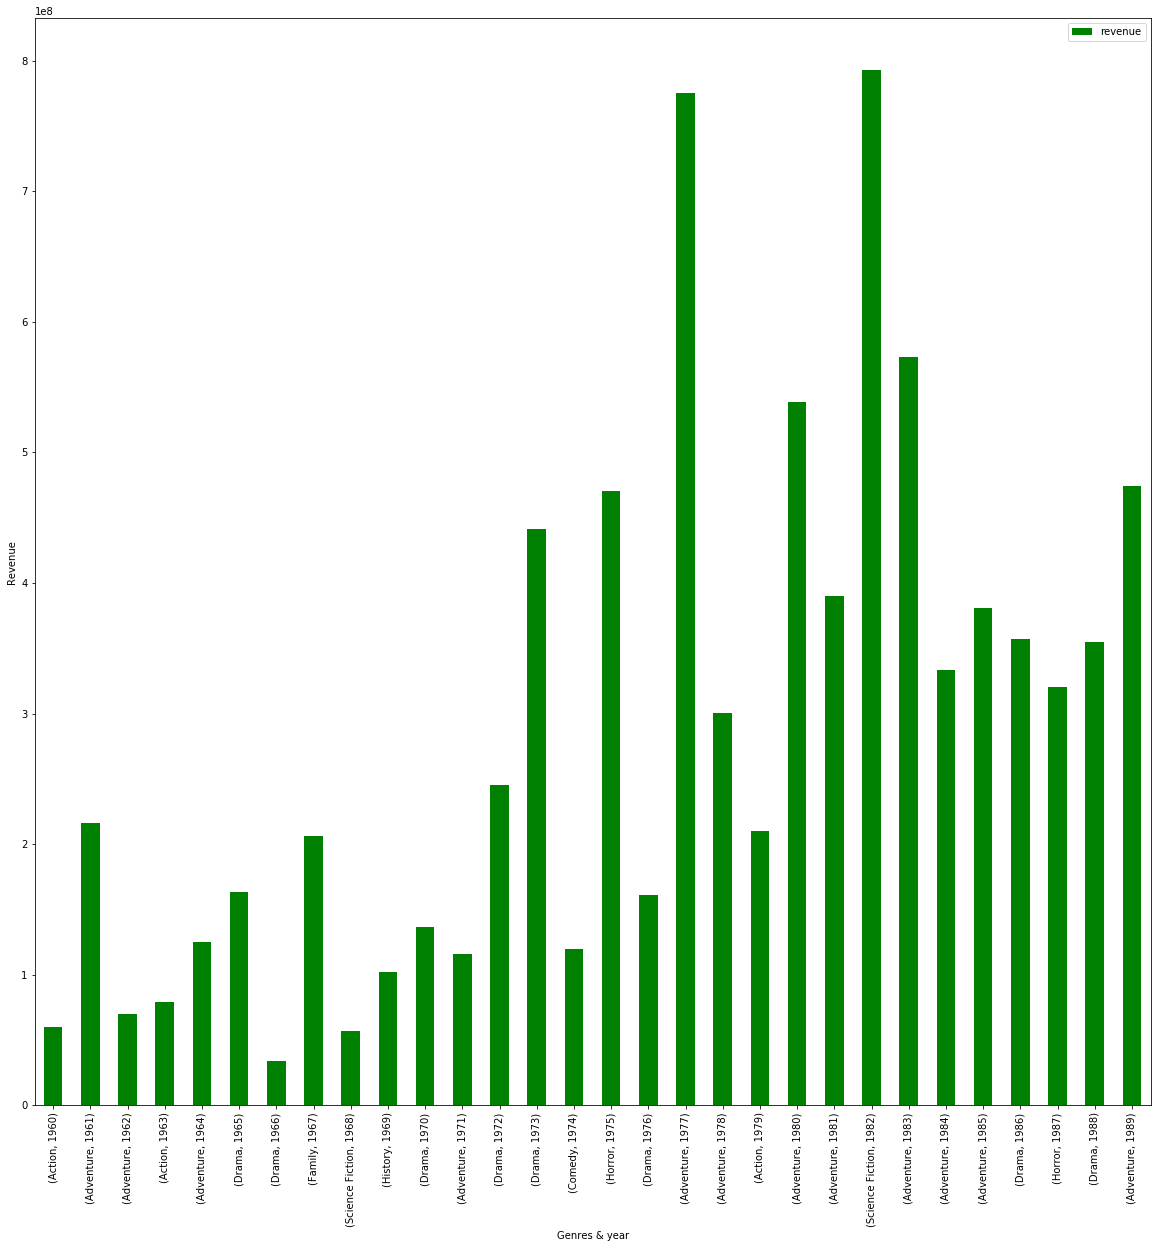

In [401]:
movies_samp1.plot(kind= 'bar', color = 'green', figsize=(20,20)) #plotting the data in a bar chart and including label names
plt.xlabel('Genres & year')
plt.ylabel('Revenue')

# We see that between 1960 to 1989, a science fiction movie in 1982 and adventure move in 1980 has the highest revenue. The movie genre varies from year to year this shows that there is no preference by people on the genre of the movie. The quality of the movie appears to be more significant that the genre. The few movies with higher revenues between 1973 to 1983 could be classified as classics. It appears that movies with the adventure genre have been the highest grossing movies 12 times in 30 years. While the action genre is suprisingly seen only 3 times. The second highest interms of appearances is drama which occurs 8 times in 30 years, this was not expected to be the case.

# Limitations: Budget and revenue values of zero are exluded from this data  as they are treated as errors in the orginal dataset. By excluding data we could be missing one of the highest revenue movies due to an error in the budget value. So this means our analysis is limited to the dataset used in the plot above until all the orginal dataset is corrected.

# splliting data into years from 1990 to 2015

In [402]:
movies_samp2 = movies_new.tail(26) # selecting the movies from 1990 to 2015 using the tail function.

# Most popular genres from 1990 to 2015

Text(0,0.5,'Revenue')

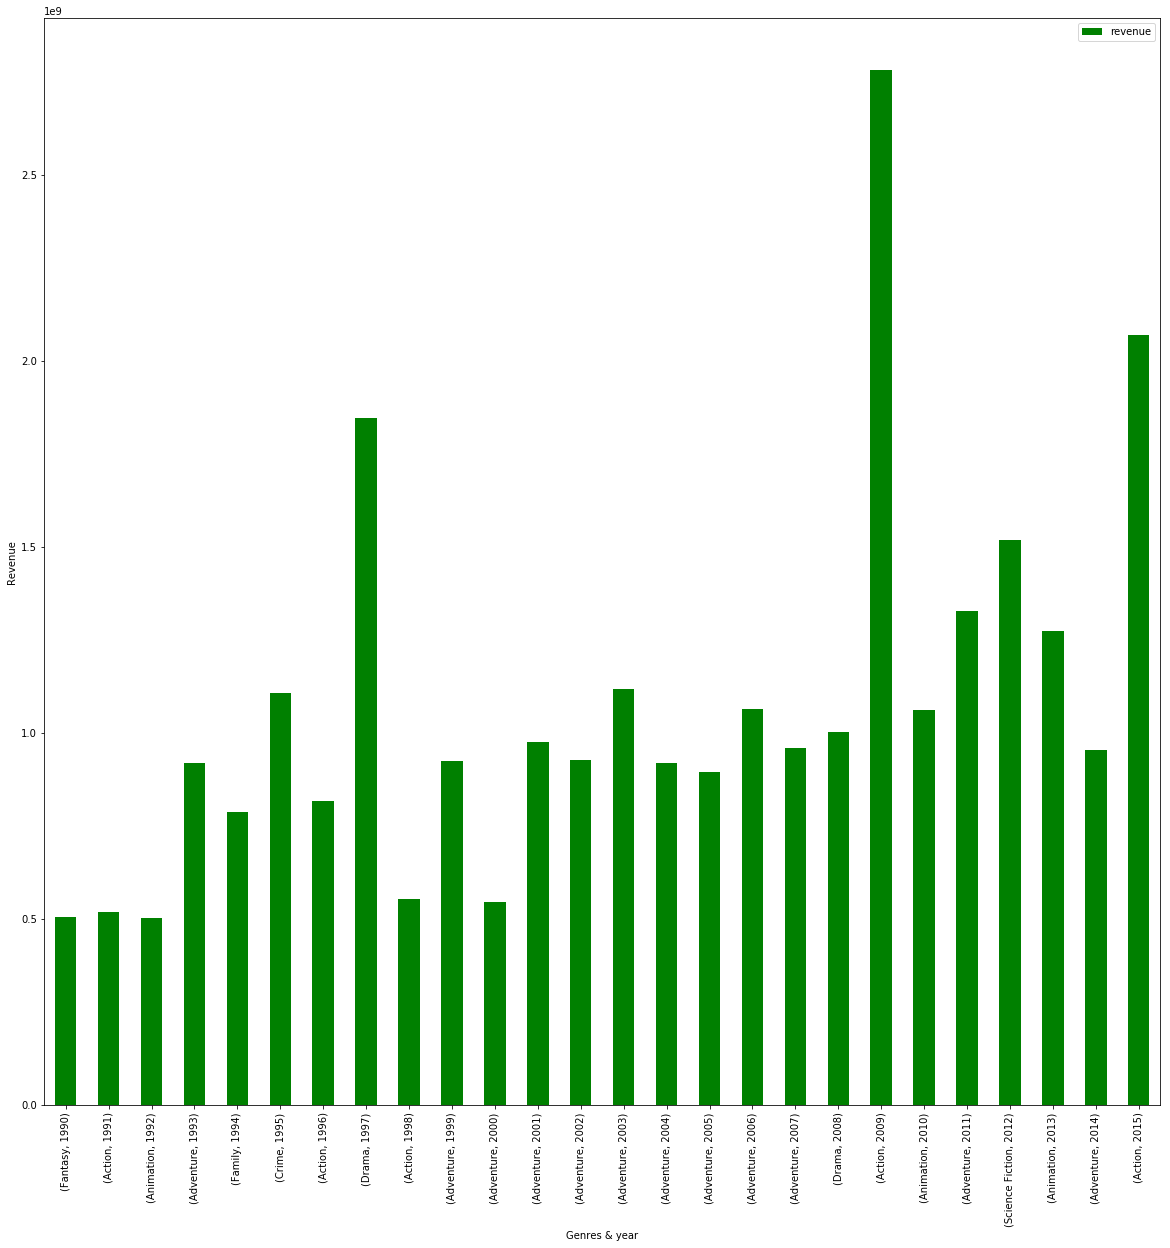

In [403]:
movies_samp2.plot(kind= 'bar', color = 'green', figsize=(20,20))  # plooting a bar chart and specifying the labels for x and y axis.
plt.xlabel('Genres & year')
plt.ylabel('Revenue')


# We find that from 1990 to 2015 the adventure genre is the highest grossing movie from 1999 to 2005. The adventure genre is seen a total of 12 time in 26 years and a total of 24 times in 56 years (1960 to 2015).  Again the action genre is seen only 5 times which is very suprising considering the popularity of the action genre. The rest of data appears to be split between other genres.

# Limitations: The genre is classified only based on primary genre. The data provided does not catergorize movies into one genre this means that the genre provided may not be related to the movie. Also budget and revenue values of zero are exluded due to these being treated as possible errors. If these errors where corrected, we could have a new values in the above plot. So we are limited to the dataset available after excluding the errors.

# Bar chart showing the counts of genres from 1960 to 2015 

Text(0.5,0,'count from 1960 to 2015')

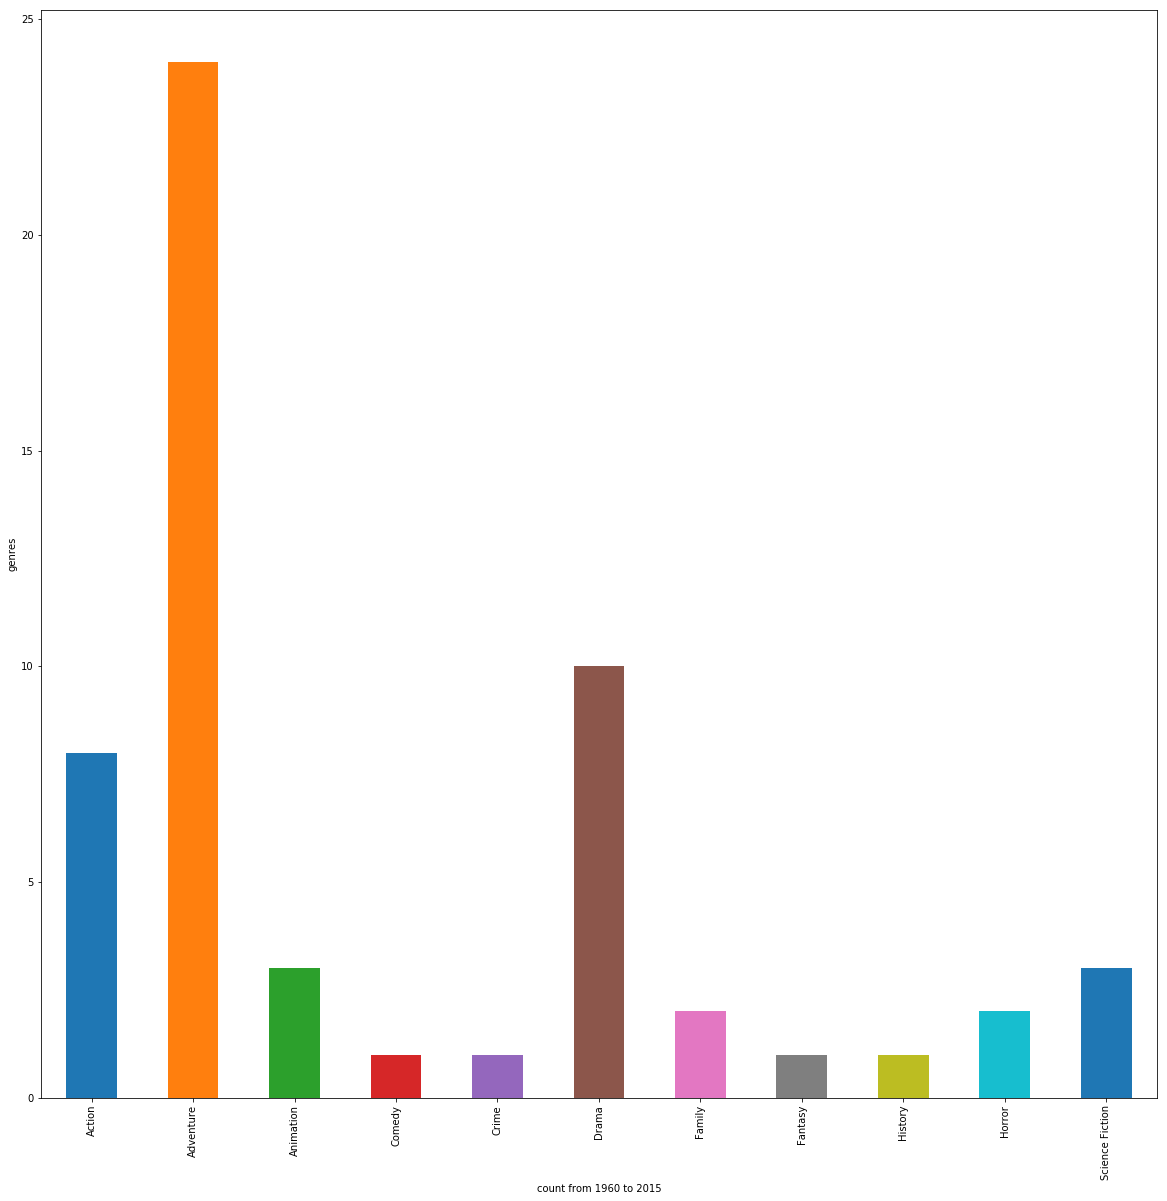

In [404]:
movies_new.groupby(['primary_genre']).size().plot(kind='bar', figsize = (20,20))
plt.ylabel('genres')
plt.xlabel('count from 1960 to 2015')

# The bar chart shows that adventure, action and drama are the most popular genres in terms of revenue from 1960 to 2015. The remaining genres appear a few times of the years in the highest revenue category. This shows that revenue is not consistent accross genres. A few genres like action, adventure and drama are likely to gross more than the remaining genres.

# Limitations: The analysis is limited by the dataset since only primary_genre is considered , there could movies that are animated but are under listed as adventure in the primary_genre. Additionally, there is a thin line between action and adventure, it might be better suited to combine both action and adventure into one category, this is not done here. This dataset is also limited due to the exclusion of budget and revenue values of zero as we consider only the highest revenue rows. If a budget value of zero has one of the highest revenues, that is surely an error in the data. After correction of these we can possibly see a change in th above plot. But currently we are limited to the data used above for analysis.

 # Continue to explore the data to address your additional research
#   How does movie revenue vary with other data?
 

# seperating data based on popularity between 0 and 11

In [405]:
movies_new1 = movies_split[movies_split['popularity'].between(0, 11, inclusive=True)] # splitting data using between function based on popularity range

In [406]:
pd.DataFrame(movies_new1) #converting the dataset to a dataframe

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,primary_actor,primary_genre
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,137,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Vin Diesel,Action
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08,Leonardo DiCaprio,Western
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Alan Taylor,125,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08,Arnold Schwarzenegger,Science Fiction
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Ridley Scott,141,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08,Matt Damon,Drama
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Kyle Balda|Pierre Coffin,91,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09,Sandra Bullock,Family
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Pete Docter,94,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08,Amy Poehler,Comedy
10,206647,tt2379713,6.200282,245000000,880674609,Spectre,Sam Mendes,148,Columbia Pictures|Danjaq|B24,10/26/15,3254,6.2,2015,2.253999e+08,8.102203e+08,Daniel Craig,Action
11,76757,tt1617661,6.189369,176000003,183987723,Jupiter Ascending,Lana Wachowski|Lilly Wachowski,124,Village Roadshow Pictures|Dune Entertainment|A...,2/4/15,1937,5.2,2015,1.619199e+08,1.692686e+08,Mila Kunis,Science Fiction
12,264660,tt0470752,6.118847,15000000,36869414,Ex Machina,Alex Garland,108,DNA Films|Universal Pictures International (UP...,1/21/15,2854,7.6,2015,1.379999e+07,3.391985e+07,Domhnall Gleeson,Drama
13,257344,tt2120120,5.984995,88000000,243637091,Pixels,Chris Columbus,105,Columbia Pictures|Happy Madison Productions,7/16/15,1575,5.8,2015,8.095996e+07,2.241460e+08,Adam Sandler,Action


# selecting the 10 highest revenue movies with popularity between 0 and 11

In [407]:
movies_new1_rev = movies_new1.nlargest(10,'revenue')# using n largest to select the top 10 values

In [408]:
movies_new2 = movies_split[movies_split['popularity'].between(12, 22, inclusive=True)] # creating the second split for popularity range


In [409]:
pd.DataFrame(movies_new2) #converting dataset to a dataframe

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,primary_actor,primary_genre
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley,Adventure
630,118340,tt2015381,14.311205,170000000,773312399,Guardians of the Galaxy,James Gunn,121,Marvel Studios|Moving Picture Company (MPC)|Bu...,7/30/14,5612,7.9,2014,1.565855e+08,7.122911e+08,Chris Pratt,Action
631,100402,tt1843866,12.971027,170000000,714766572,Captain America: The Winter Soldier,Joe Russo|Anthony Russo,136,Marvel Studios,3/20/14,3848,7.6,2014,1.565855e+08,6.583651e+08,Chris Evans,Action
1329,11,tt0076759,12.037933,11000000,775398007,Star Wars,George Lucas,121,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09,Mark Hamill,Adventure


# selecting the 10 highest revenue movies with popularity between 12 and 21

In [410]:
movies_new2_rev = movies_new2.nlargest(10,'revenue') #using nlargest to select the top 10

In [411]:
movies_new3 = movies_split[movies_split['popularity'].between(23, 33, inclusive=True)] #using between function to select the 3rd set based on popularity

In [412]:
pd.DataFrame(movies_new3)# converting dataset to a dataframe


,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,primary_actor,primary_genre
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Action
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy,Action
629,157336,tt0816692,24.949134,165000000,621752480,Interstellar,Christopher Nolan,169,Paramount Pictures|Legendary Pictures|Warner B...,11/5/14,6498,8.0,2014,1.519800e+08,5.726906e+08,Matthew McConaughey,Adventure


# selecting the 10 highest revenue movies with popularity between 22 and 33

In [413]:
movies_new3_rev = movies_new3.nlargest(10,'revenue') #using nlargest to select the top 10

# combining data from popularity ranges of 12 to 21 and 22 to 33

In [414]:
movies_check = movies_new3_rev.append(movies_new2_rev) #combining data using append

# appending data from popularity ranges of 0-11

In [415]:
movies_pop_check = movies_check.append(movies_new1_rev) #combining data using append to a new dataset

In [416]:
movies_pop_check #checking the dataset

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,primary_actor,primary_genre
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Action
629,157336,tt0816692,24.949134,165000000,621752480,Interstellar,Christopher Nolan,169,Paramount Pictures|Legendary Pictures|Warner B...,11/5/14,6498,8.0,2014,1.519800e+08,5.726906e+08,Matthew McConaughey,Adventure
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy,Action
1329,11,tt0076759,12.037933,11000000,775398007,Star Wars,George Lucas,121,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09,Mark Hamill,Adventure
630,118340,tt2015381,14.311205,170000000,773312399,Guardians of the Galaxy,James Gunn,121,Marvel Studios|Moving Picture Company (MPC)|Bu...,7/30/14,5612,7.9,2014,1.565855e+08,7.122911e+08,Chris Pratt,Action
631,100402,tt1843866,12.971027,170000000,714766572,Captain America: The Winter Soldier,Joe Russo|Anthony Russo,136,Marvel Studios,3/20/14,3848,7.6,2014,1.565855e+08,6.583651e+08,Chris Evans,Action
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley,Adventure
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,James Cameron,162,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09,Sam Worthington,Action
5231,597,tt0120338,4.355219,200000000,1845034188,Titanic,James Cameron,194,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09,Kate Winslet,Drama
4361,24428,tt0848228,7.637767,220000000,1519557910,The Avengers,Joss Whedon,143,Marvel Studios,4/25/12,8903,7.3,2012,2.089437e+08,1.443191e+09,Robert Downey Jr.,Science Fiction


# checking if revenue depends on popularity by taking the top 10 grossing movies accorss 3 different opularity sections

C:\Users\prane\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0,0.5,'revenue')

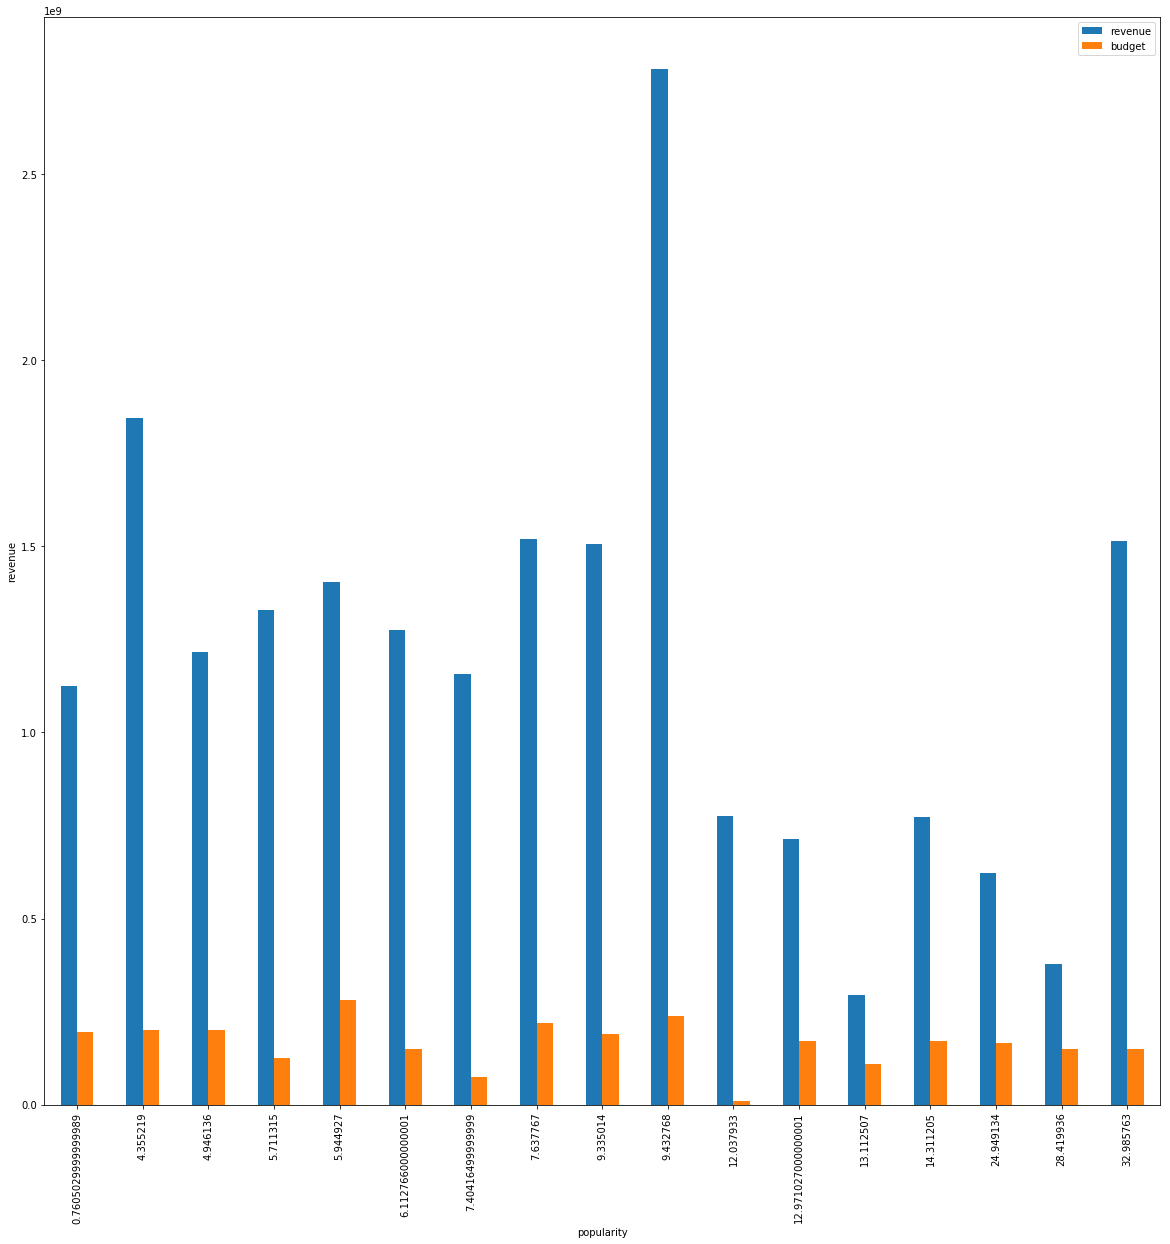

In [417]:
movies_pop_check.sort_values(by='popularity',ascending=True).plot(x='popularity',y=['revenue', 'budget'],kind='bar', figsize = (20,20))
plt.xlabel("popularity")
plt.ylabel("revenue") #plotting a bar graph to check if revenue depends on popularity

# Does revenue depend on popularity?. No it does not. The revenue values appear to be higher from 4 to 9 when compared to 12 to 32. Another thing of note is that the popular movies shown in the graph appear to have revenue significantly higher the budget, this shows that these movies were profitable inspite of their low popularity ratings. 

# Limitations: There appears to be large amount of the data with popularity between 0 and 11, fewer rows where found between 11 and 33. I am not sure how the popularity rating is considered. A larger dataset for popularity rating between 11 and 33 will help better analyse data. Additionally the data does not include revenue values and budget values that are zero, since these rows are excluded. We cannot study other unique charatersistics such as if the popularity value is zero for a movie with revenue close to 0. Once these errors are corrected, we can possibly see changes to the plot above.

# checking if there is a user preference with respect to runtime, data analysed is the highest grossing movies in 3 different popularity groups

Text(0,0.5,'runtime')

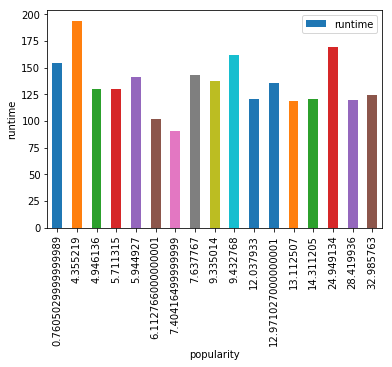

In [418]:
movies_pop_check.sort_values(by='popularity',ascending=True).plot(x='popularity', y='runtime', kind='bar') #plotting a bar chart on popularity vs runtime
plt.xlabel("popularity")
plt.ylabel("runtime")

# Are runtime and popularity related?. No. The runtime appears to be relatively constant inspite of increase in popularity. There are no special runtimes for large popularity values, while there are no outliers in runtime for smaller popualrity values.

# Limitations: Since rows with budget or revenue values of zero are excluded our dataset is limited. We could have budget or revenue to be close to zero but with a high popularity values, the runtime values could  also be significantly higher or lower for these values. So our analysis is limited to the movies and  movies_pop_check dataset. If all values are considered we will have a greater variation of popularity and runtime.

# checking how revenue is distributed based on runtime

C:\Users\prane\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0,0.5,'revenue')

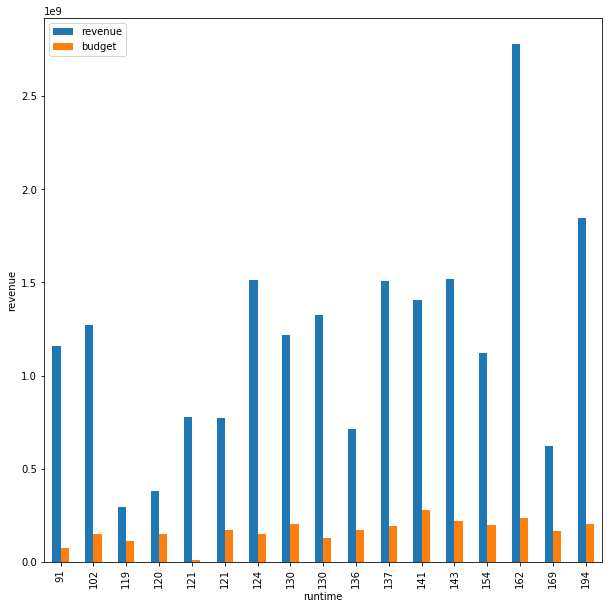

In [419]:
movies_pop_check.sort_values(by='runtime',ascending=True).plot(x='runtime', y=['revenue', 'budget'], kind='bar', figsize = (10,10))
plt.xlabel("runtime")
plt.ylabel("revenue")

# Does revenue depend on runtime?. Cannot be determined from plot. Runtime values higher than 121 show consistent revenue values than those below them. The values at 136 and 169 need to be studied with a larger dataset. But it appears that runtime between 121 and 194 show greater consistency in revenue than others.

# Limitations: Since rows with budget or revenue values of zero are excluded, we do not see how runtime might have affected a movie with a budget close to zero or revenue close to zero. Budget or revenue value of zero is considered to be an error. With this dataset, we do not analyse the data excluded so we cannot see if an abnormal runtime could be a cause of budget or revenue being close to zero.

# checking if higher vote_average values lead to higher revenue

Text(0,0.5,'revenue')

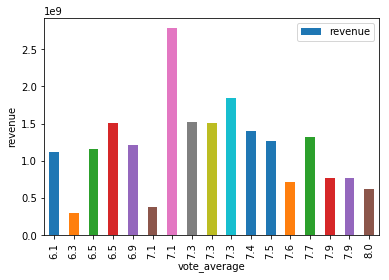

In [420]:
movies_pop_check.sort_values(by='vote_average',ascending=True).plot(x='vote_average', y='revenue', kind='bar') #plotting a bar chart between vote_average and revenue with x and y labels
plt.xlabel("vote_average")
plt.ylabel("revenue")

# Does revenue depend on vote_average?. No. Revenue does not a postive or negative correlation with vote_average. The highest revenue does not have the highest vote average. Averages above 7.1 are more consistent but the revenue appears to decrease below 7.7. Thus revenue cannot be predicted with the vote_average value.

# Limitations: Since budget and revenue values of zero are excluded from the analysis. We do not see how vote_average might have affected revenue. For example  after correction to errors if the vote_average was also close to zero for a revenue value close to zero. It would mean that further analysis of the dataset is needed or if the vote_average was high but the revenue was close to zero,we could then conclude that revenue does not depend on vote_average.

# checking if the top grossing movies have high budget, does popularity depend on budget?

Text(0,0.5,'revenue')

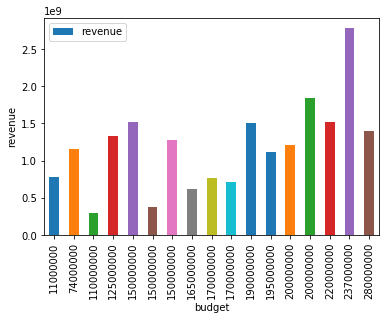

In [421]:
movies_pop_check.sort_values(by='budget',ascending=True).plot(x='budget', y='revenue', kind='bar') # plotting budget vs revenue in a bar graph with x and y labels.
plt.xlabel("budget")
plt.ylabel("revenue")

# Does revenue depend on budget?. Need more information. This plot shows that revenue is more consistent for budgets above 17000000. But below that value revenue appears to be more conistent with high and low values. I can conclude that budgets above 17000000 can be higher revenue but budget below this value can have unpredictable revenue.

# Limitations: Further examination based on budget ranges will provide better understanding of the budget and revenue relationship. Since budget and revenue values of zero are excluded and treated as erros.We cannot understand if a lower budget value could have contributed to a close to zero revenue or if there are more than few cases where medium budget movies have close to zero revenue. Budget or revenue values of zero are considered to be erros but after correcting the data it would help me us better understand budget vs revenue relationship. Since that data is excluded we are limited to the dataset used for the above analysis.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. It's also a good idea to look over the project rubric, found on the project submission page at the end of the lesson.

> To export the report to the workspace, you should run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the jupyter icon in the upper left). Alternatively, you can download the html report via the **File** > **Download as** submenu and then manually upload it to the workspace directory. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right. Congratulations!

1) a.On plotting the director, primary_Actor vs revenue bar graph, we find that the director, primary actor combination with highest revenue is David yates and Daniel radcliffe
  b. We then study how budget varies with genres,Animation and adventure have the highest budget value. Depending on the genre, a movie budget can vary from relatively low to high.
  c. Runtimes between 100 and 180 have higher count of budget values. Runtimes greater than 180 and less than 100 have smaller budget values. The budget values do not have a linear relationship with runtime. More than 80% of budget values from 1960 to 2015 are in that range so there is high probability that next years data will also contain a large amount of budget values in the same range.
   d. Budget values have a postive correlation with year as expected. As we progress through the years, movie budgets have gotten higher.
   e.The popularity values are concentrated between runtimes of 100 to 200 and 80% of the values are between 0 to 10. Popularity does not increase or decrease with runtime but is focussed within a range for all runtime values.
   f. Budget does not have a relationship with popularity. Medium and high budget share popularity values with low budget movies. Popularity values of 0 to 10  captures close to 80% of the movies. This shows that budget and popularity are not correlated.
 

2) The second question focuses on what genres are popular from year to year. The popular genres from 1960 to 2015 are adventure, action and drama. Adventure genre has the maximum number of occurences of 24, the drama genre is unexpectedly more popular than war or comedy. Adventure genre is also seen to be very successful between years of 1999 to 2007.

3) a.We find contradictory to general assumptions, the most popular movie is not the highest grossing movie.Infact movies with popularity rating between 4 to 9 have a higher revenues that those between 12 to 28. The revenues and popularity do not appear to be related to each other at all The  The budgets are fairly consistent and are relatively small when compared with revenue. All the movies shown the graph are profitable inspite of their popularity values.
   b.Runtime values between 121 to 194 show greater in revenue than others. We see a few higher values towards the end of the plot but it is possible to accurately determine their correlation. I believe that a within a certain runtime range there is a greater percentage of high revenue values. This can determined only by further analysis
   c.Interms of vote_average. We see that the values between 7.1 and 7.3 have the highest vote_average values. The general assumption is that higher vote_average will have higher_revenue but this is proven wrong. Thus we can conclude higher vote_average will not neccesarily mean higher revenue.
   d.Budget and revenue show some positive relationship for budget values higher than 170000000 show higher revenue values than the lower budget values. Considering that the highest revenue values are taken in this dataset, another sample must examined to clearly understand the relationship. But i can conclude that the budget value does not determine revenue, lower budgets can result in higher revenues and vice-versa.
   e. Another interesting thing of note is 4 movies have popularities between 12 and 22, 3 movies have popularities between 23 and 33. The remaining movies have popularities between 0 and 11. The revenues of movies with popularity between 12 and 33 are not significant.This shows that popularity and revenue do not have a positive correlation.

In [422]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0